# Exercise 08

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

#Ejercicio presentado por:

Alexandra Pinzon  Código: 201728019

Ricardo Blanco   Código: 201727686

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

gpg: keybox '/tmp/tmp0e_3fivr/pubring.gpg' created
gpg: /tmp/tmp0e_3fivr/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [0]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

··········


In [4]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [5]:
print('Tweets.zip:')
!ls drive/Tweets.zip

Tweets.zip:
drive/Tweets.zip


In [6]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('drive/Tweets.zip', 'r') as z:
    f = z.open('Tweets.csv')
    tweets = pd.read_csv(f, index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [8]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [9]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

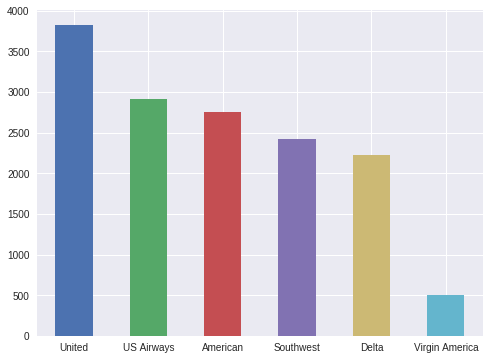

In [10]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

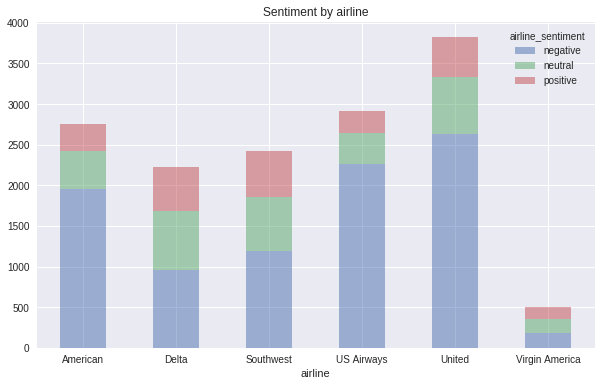

In [11]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 8.1 

Predict the sentiment using CountVectorizer, stopwords, n_grams, stemmer, TfidfVectorizer

use Random Forest classifier

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [13]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})
print(X.shape)

(14640,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Proband CountVectorizer

In [16]:
vect = CountVectorizer()
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 12056)

In [17]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
#transforma test
X_test_transformado = vect.transform(X_test)

In [19]:
#Validacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.731169
std       0.012802
min       0.715768
25%       0.721734
50%       0.732156
75%       0.737356
max       0.757261
dtype: float64

#Proband Stopwords

In [20]:
vect = CountVectorizer(stop_words='english')
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 11777)

In [21]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
#transforma test
X_test_transformado = vect.transform(X_test)

In [23]:
#Validacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.713774
std       0.015813
min       0.695021
25%       0.702689
50%       0.709392
75%       0.728351
max       0.736515
dtype: float64

#Probando n_grams

In [24]:
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 22011)

In [25]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
#transforma test
X_test_transformado = vect.transform(X_test)

In [27]:
#Validacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.724579
std       0.015904
min       0.692784
25%       0.716569
50%       0.728216
75%       0.734060
max       0.744813
dtype: float64

#Probando Stemmer

In [0]:
stemmer = SnowballStemmer('english')

In [29]:
# define a function that accepts text and returns a list of lemmas
def split_into_stemmer(text):
    text = text.lower()
    words = text.split()
    return [stemmer.stem(word) for word in words]

vect = CountVectorizer(analyzer=split_into_stemmer)
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 18559)

In [30]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
#transforma test
X_test_transformado = vect.transform(X_test)

In [32]:
#Validacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.720207
std       0.010898
min       0.701863
25%       0.712433
50%       0.721827
75%       0.727412
max       0.738589
dtype: float64

#Probando TfidfVectorizer

In [33]:
vect = TfidfVectorizer()
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

(9808, 12056)

In [37]:
#Modelo Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_transformado, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
#transforma test
X_test_transformado = vect.transform(X_test)

In [39]:
#Evaluacion
pd.Series(cross_val_score(RandomForest, X_test_transformado, y_test, cv=10)).describe()

count    10.000000
mean      0.721014
std       0.015578
min       0.699170
25%       0.710513
50%       0.723428
75%       0.731443
max       0.744813
dtype: float64

# Exercise 8.2

Train a Deep Neural Network with the following architecture:

- Input = text 
- Dense(128)
- Relu Activation
- BatchNormalization
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [0]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization

In [44]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
y_train_cat = keras.utils.to_categorical(y_train,num_classes=3)
y_test_cat = keras.utils.to_categorical(y_test,num_classes=3)

vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
dtm = vect.fit(X_train)
X_train_transformado = vect.transform(X_train)
X_train_transformado.shape

print(X_train_transformado.shape)
tamano = X_train_transformado.shape[1]

(9808, 22011)


In [0]:
Newmodel = Sequential()

Newmodel.add(Dense(128, input_shape=(tamano,)))
Newmodel.add(Activation('relu'))
Newmodel.add(BatchNormalization())
Newmodel.add(Dropout(0.5))
Newmodel.add(Dense(10))
Newmodel.add(Activation('softmax'))
Newmodel.add(Dense(3))
Newmodel.add(Activation('softmax'))

In [46]:
Newmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               2817536   
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
__________

In [0]:
from keras.optimizers import RMSprop
Newmodel.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [49]:
batch_size = 32
epochs = 50
history = Newmodel.fit(X_train_transformado, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8827 samples, validate on 981 samples
Epoch 1/50
8827/8827 [==============================] - 16s 2ms/step - loss: 0.6121 - acc: 0.8070 - val_loss: 0.6429 - val_acc: 0.7768
Epoch 2/50
7168/8827 [=======================>......] - ETA: 2s - loss: 0.5002 - acc: 0.8640

8827/8827 [==============================] - 15s 2ms/step - loss: 0.4946 - acc: 0.8651 - val_loss: 0.6026 - val_acc: 0.7941
Epoch 3/50
8827/8827 [==============================] - 16s 2ms/step - loss: 0.4071 - acc: 0.8903 - val_loss: 0.5917 - val_acc: 0.7859
Epoch 4/50
3264/8827 [==========>...................] - ETA: 9s - loss: 0.3417 - acc: 0.9157

8827/8827 [==============================] - 15s 2ms/step - loss: 0.3449 - acc: 0.9079 - val_loss: 0.6209 - val_acc: 0.7819
Epoch 5/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.2963 - acc: 0.9178 - val_loss: 0.6370 - val_acc: 0.7768
Epoch 6/50
3744/8827 [===========>..................] - ETA: 8s - loss: 0.2779 - acc: 0.9199

8827/8827 [==============================] - 15s 2ms/step - loss: 0.2780 - acc: 0.9170 - val_loss: 0.6611 - val_acc: 0.7706
Epoch 7/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.2413 - acc: 0.9326 - val_loss: 0.6741 - val_acc: 0.7747
Epoch 8/50
4000/8827 [============>.................] - ETA: 7s - loss: 0.1977 - acc: 0.9457

8827/8827 [==============================] - 14s 2ms/step - loss: 0.2175 - acc: 0.9391 - val_loss: 0.6770 - val_acc: 0.7788
Epoch 9/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1998 - acc: 0.9439 - val_loss: 0.7425 - val_acc: 0.7666
Epoch 10/50
5728/8827 [==================>...........] - ETA: 4s - loss: 0.1907 - acc: 0.9443

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1964 - acc: 0.9429 - val_loss: 0.7762 - val_acc: 0.7655
Epoch 11/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1864 - acc: 0.9453 - val_loss: 0.7680 - val_acc: 0.7574
Epoch 12/50
7456/8827 [========================>.....] - ETA: 2s - loss: 0.1728 - acc: 0.9497

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1755 - acc: 0.9490 - val_loss: 0.7872 - val_acc: 0.7625
Epoch 13/50
8827/8827 [==============================] - 13s 2ms/step - loss: 0.1789 - acc: 0.9466 - val_loss: 0.8129 - val_acc: 0.7655
Epoch 14/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1635 - acc: 0.9530 - val_loss: 0.8022 - val_acc: 0.7625


Epoch 15/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1608 - acc: 0.9539 - val_loss: 0.8218 - val_acc: 0.7706
Epoch 16/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1547 - acc: 0.9528 - val_loss: 0.8218 - val_acc: 0.7615
Epoch 17/50
6304/8827 [====================>.........] - ETA: 3s - loss: 0.1561 - acc: 0.9546

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1479 - acc: 0.9575 - val_loss: 0.8351 - val_acc: 0.7584
Epoch 18/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1323 - acc: 0.9607 - val_loss: 0.8606 - val_acc: 0.7594
Epoch 19/50
7520/8827 [========================>.....] - ETA: 1s - loss: 0.1364 - acc: 0.9601

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1332 - acc: 0.9619 - val_loss: 0.8604 - val_acc: 0.7666
Epoch 20/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1353 - acc: 0.9605 - val_loss: 0.8752 - val_acc: 0.7737
Epoch 21/50
6880/8827 [======================>.......] - ETA: 2s - loss: 0.1438 - acc: 0.9592

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1397 - acc: 0.9600 - val_loss: 0.9168 - val_acc: 0.7574
Epoch 22/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1323 - acc: 0.9634 - val_loss: 0.9050 - val_acc: 0.7574
Epoch 23/50
7968/8827 [==========================>...] - ETA: 1s - loss: 0.1352 - acc: 0.9615

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1349 - acc: 0.9611 - val_loss: 0.9094 - val_acc: 0.7645
Epoch 24/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1308 - acc: 0.9627 - val_loss: 0.8945 - val_acc: 0.7645
Epoch 25/50
6336/8827 [====================>.........] - ETA: 3s - loss: 0.1372 - acc: 0.9602

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1312 - acc: 0.9622 - val_loss: 0.8839 - val_acc: 0.7655
Epoch 26/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1321 - acc: 0.9611 - val_loss: 0.9138 - val_acc: 0.7717
Epoch 27/50
6144/8827 [===================>..........] - ETA: 4s - loss: 0.1125 - acc: 0.9665

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1178 - acc: 0.9647 - val_loss: 0.9205 - val_acc: 0.7696
Epoch 28/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1205 - acc: 0.9653 - val_loss: 0.9226 - val_acc: 0.7635
Epoch 29/50
7136/8827 [=======================>......] - ETA: 2s - loss: 0.1159 - acc: 0.9671

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1159 - acc: 0.9668 - val_loss: 0.9233 - val_acc: 0.7645
Epoch 30/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1166 - acc: 0.9664 - val_loss: 0.9496 - val_acc: 0.7615
Epoch 31/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1203 - acc: 0.9653 - val_loss: 0.9414 - val_acc: 0.7655
Epoch 32/50
 160/8827 [..............................] - ETA: 13s - loss: 0.1009 - acc: 0.9750

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1162 - acc: 0.9647 - val_loss: 0.9571 - val_acc: 0.7655
Epoch 33/50
8827/8827 [==============================] - 13s 2ms/step - loss: 0.1103 - acc: 0.9679 - val_loss: 0.9514 - val_acc: 0.7696
Epoch 34/50
6432/8827 [====================>.........] - ETA: 3s - loss: 0.1189 - acc: 0.9652

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1142 - acc: 0.9666 - val_loss: 0.9506 - val_acc: 0.7727
Epoch 35/50
8827/8827 [==============================] - 13s 1ms/step - loss: 0.1115 - acc: 0.9677 - val_loss: 0.9431 - val_acc: 0.7686
Epoch 36/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1192 - acc: 0.9674 - val_loss: 0.9642 - val_acc: 0.7604
Epoch 37/50
 320/8827 [>.............................] - ETA: 12s - loss: 0.1604 - acc: 0.9531

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1164 - acc: 0.9650 - val_loss: 0.9826 - val_acc: 0.7686
Epoch 38/50
8827/8827 [==============================] - 13s 2ms/step - loss: 0.1008 - acc: 0.9708 - val_loss: 0.9418 - val_acc: 0.7645
Epoch 39/50
7264/8827 [=======================>......] - ETA: 2s - loss: 0.1206 - acc: 0.9657

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1139 - acc: 0.9674 - val_loss: 0.9652 - val_acc: 0.7645
Epoch 40/50
8827/8827 [==============================] - 13s 2ms/step - loss: 0.1073 - acc: 0.9690 - val_loss: 0.9577 - val_acc: 0.7727
Epoch 41/50
8160/8827 [==========================>...] - ETA: 1s - loss: 0.1071 - acc: 0.9703

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1086 - acc: 0.9698 - val_loss: 0.9686 - val_acc: 0.7727
Epoch 42/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1103 - acc: 0.9694 - val_loss: 0.9863 - val_acc: 0.7727
Epoch 43/50
7776/8827 [=========================>....] - ETA: 1s - loss: 0.1082 - acc: 0.9697

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1097 - acc: 0.9692 - val_loss: 0.9969 - val_acc: 0.7676
Epoch 44/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1016 - acc: 0.9712 - val_loss: 1.0181 - val_acc: 0.7594
Epoch 45/50
8800/8827 [============================>.] - ETA: 0s - loss: 0.1012 - acc: 0.9707

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1010 - acc: 0.9708 - val_loss: 1.0231 - val_acc: 0.7625
Epoch 46/50
8827/8827 [==============================] - 13s 2ms/step - loss: 0.0998 - acc: 0.9716 - val_loss: 1.0358 - val_acc: 0.7604
Epoch 47/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.0990 - acc: 0.9716 - val_loss: 1.0518 - val_acc: 0.7604
Epoch 48/50
 544/8827 [>.............................] - ETA: 12s - loss: 0.0921 - acc: 0.9761

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1027 - acc: 0.9712 - val_loss: 1.0382 - val_acc: 0.7645
Epoch 49/50
8827/8827 [==============================] - 14s 2ms/step - loss: 0.1003 - acc: 0.9710 - val_loss: 1.0513 - val_acc: 0.7604
Epoch 50/50
6496/8827 [=====================>........] - ETA: 3s - loss: 0.1085 - acc: 0.9669

8827/8827 [==============================] - 14s 2ms/step - loss: 0.1049 - acc: 0.9690 - val_loss: 1.0287 - val_acc: 0.7615


In [51]:
X_test_transformado = vect.transform(X_test)
score = Newmodel.evaluate(X_test_transformado, y_test_cat)
print('Test score:', score[0])
print('Test accuracy:', score[1])

4832/4832 [==============================] - 2s 335us/step
Test score: 0.9178551319024421
Test accuracy: 0.7837334437086093
